In [1]:
#import the required libraries for the EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

In [2]:
# Get the absolute path to the parent directory
parent_dir = os.path.dirname(os.getcwd())

# Add the parent directory to sys.path
sys.path.append(parent_dir)
from scripts.handler import Handler
from scripts import visualizer

In [3]:
def loding_data(path=None):
    try: 
        df = pd.read_csv(path, sep="|", low_memory=False, encoding='utf-8')
    except Exception as e:
        print(f"Error loading the DataFrame: {e}")
        return None
    else:
        print(df.head())
        return df

In [4]:
# loding the data
path = "../data/MachineLearningRating_v3.txt"
acis_df = loding_data(path)
if acis_df is not None:
    print(acis_df.sample(3))
else:
    print("Failed to load the DataFrame.")

   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

In [5]:
df_obj = Handler(acis_df)

In [6]:
acis_df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [6]:
df_obj.data_overview()

Number of rows: 1000098
Number of columns: 52

Data Types:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodyt

In [7]:
df_obj.check_duplicate()


Duplicated values:
0 duplicated rows


In [8]:
df_obj.calculate_missing_percentage()

                          Missing Values Percentage Missing
UnderwrittenCoverID                    0              0.00%
PolicyID                               0              0.00%
TransactionMonth                       0              0.00%
IsVATRegistered                        0              0.00%
Citizenship                            0              0.00%
LegalType                              0              0.00%
Title                                  0              0.00%
Language                               0              0.00%
Bank                              145961             14.59%
AccountType                        40232              4.02%
MaritalStatus                       8259              0.83%
Gender                              9536              0.95%
Country                                0              0.00%
Province                               0              0.00%
PostalCode                             0              0.00%
MainCrestaZone                         0

In [9]:
# drop columns
df_obj.drop_columns()

# fill nan value 
acis_df['Bank'].fillna('Unknown', inplace=True)
acis_df['AccountType'].fillna('Unknown', inplace=True)

#drop cols that contains missing value
acis_df.dropna(inplace=True)

In [10]:
# Test
df_obj.calculate_missing_percentage()

                          Missing Values Percentage Missing
UnderwrittenCoverID                    0              0.00%
PolicyID                               0              0.00%
TransactionMonth                       0              0.00%
IsVATRegistered                        0              0.00%
Citizenship                            0              0.00%
LegalType                              0              0.00%
Title                                  0              0.00%
Language                               0              0.00%
Bank                                   0              0.00%
AccountType                            0              0.00%
MaritalStatus                          0              0.00%
Gender                                 0              0.00%
Country                                0              0.00%
Province                               0              0.00%
PostalCode                             0              0.00%
MainCrestaZone                         0

In [11]:
# convert object dtype into datetime
acis_df['TransactionMonth'] = pd.to_datetime(acis_df['TransactionMonth']).dt.month_name()

In [12]:
# Handling outliers
clean_df = df_obj.remove_iqr_outliers() 

# Storing Clean data

In [14]:
# dorp columns that contains missing values more than 60
clean_df.to_csv("../data/clean_acis_data.csv")

## Univariate Analysis
Distribution of Variables: Plot histograms for numerical columns and bar charts for categorical columns to understand distributions.

In [3]:
clean_acis_df = pd.read_csv("../data/clean_acis_data.csv", low_memory=False)
#clean_acis_df.head()

In [20]:
num_cols = ['CalculatedPremiumPerTerm', 'TotalPremium',  'TotalClaims']

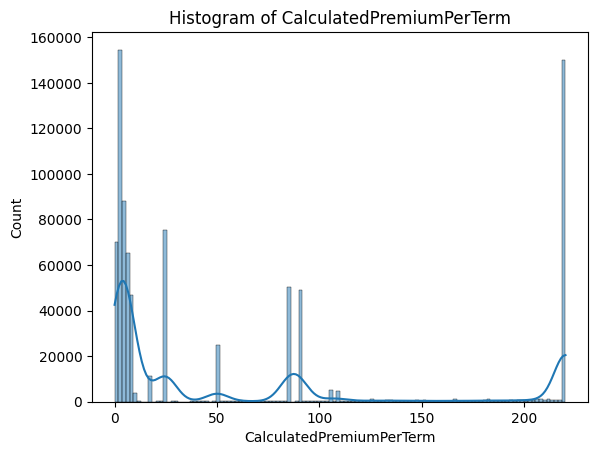

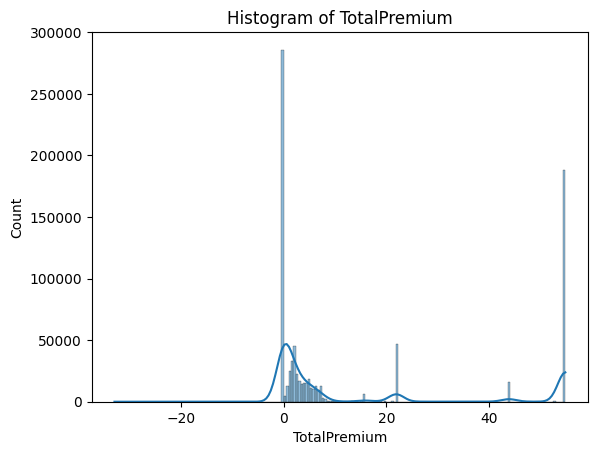

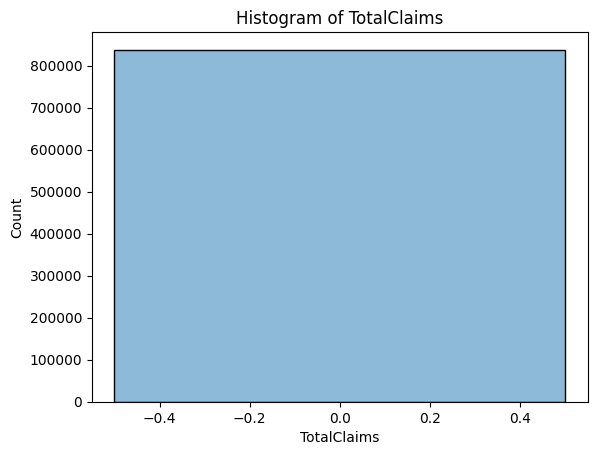

In [21]:
for col in num_cols:
    visualizer.plot_histogram(clean_acis_df, col)

In [7]:
cat_cols = ['TransactionMonth', "Bank", 'Gender', 'LegalType', 'NewVehicle', 'TermFrequency', 'Section', 'Product']

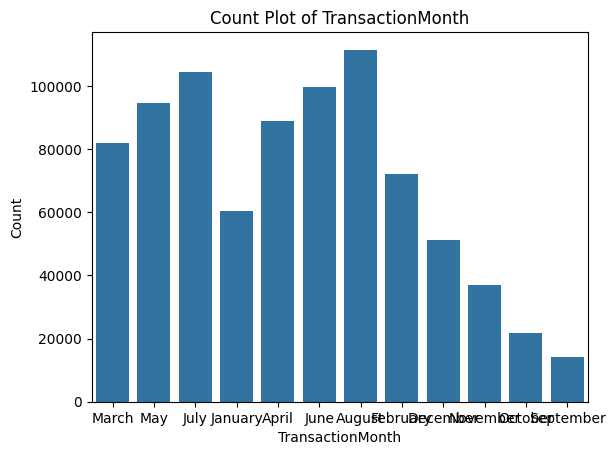

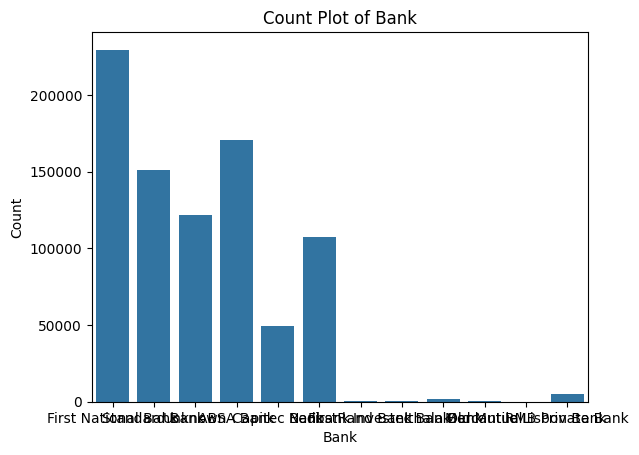

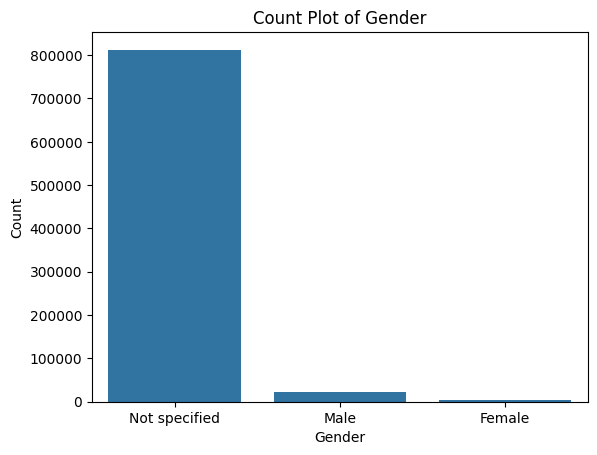

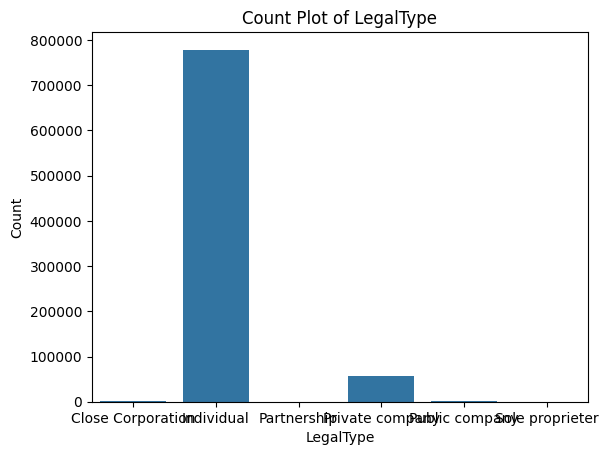

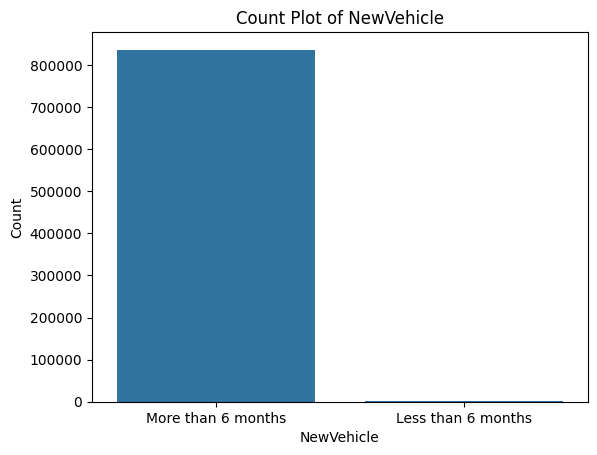

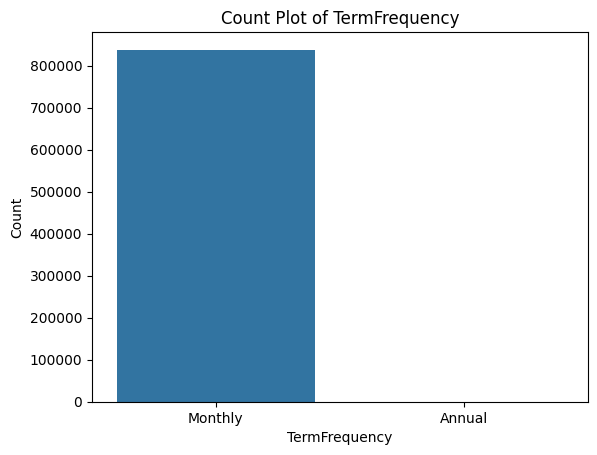

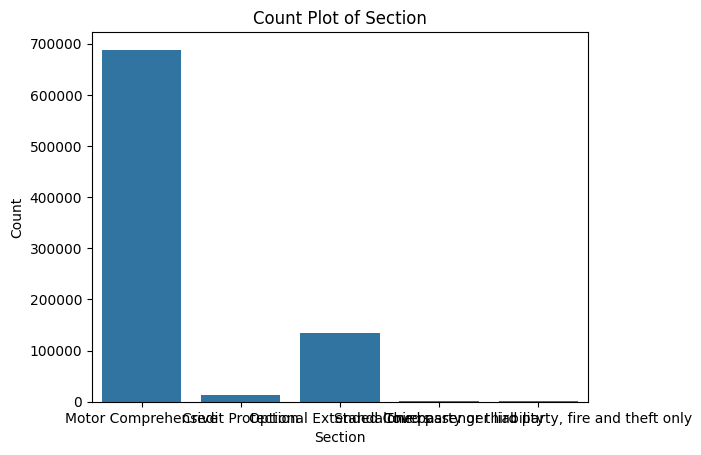

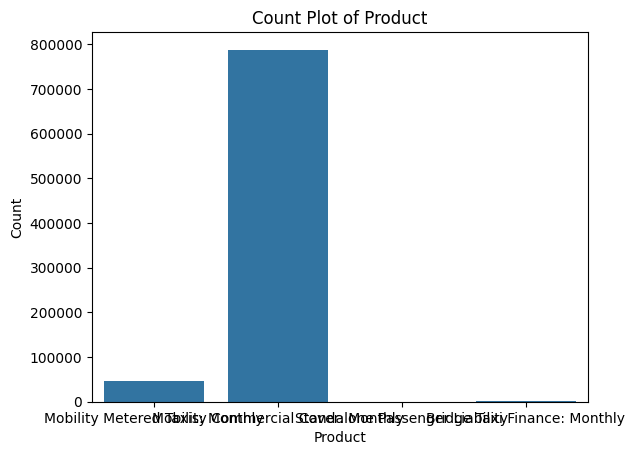

In [10]:
for col in cat_cols:
    visualizer.plot_count(clean_acis_df, col)
    #plt.xticks(rotation=10)

# Bivariate Analysis
Correlations and Associations: Explore relationships between the monthly changes TotalPremium and TotalClaims as a function of PostalCode, using scatter plots and correlation matrices.


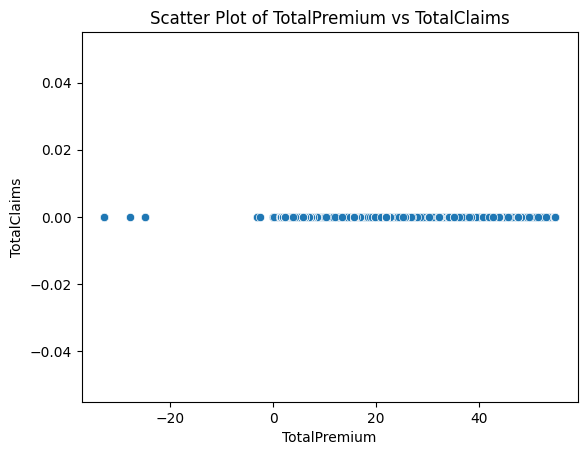

In [11]:
# scatter plot
visualizer.plot_scatter(clean_acis_df, 'TotalPremium', 'TotalClaims')

The above scatter plot shows that there is no corelation between TotalPremium and TotalClaims.

In [12]:
# scatter plot
visualizer.plot_boxplot(clean_acis_df, 'TotalPremium', 'PostalCode')